In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.1


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneakers', 'Bag', 'Ankle Boot']

In [9]:
train_images.shape #60000 images, each image is 28 X 28 pixels

(60000, 28, 28)

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

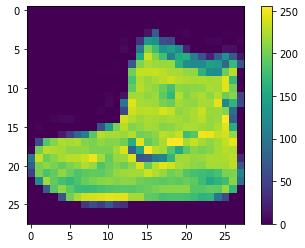

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images /255.0
test_images = test_images / 255.0

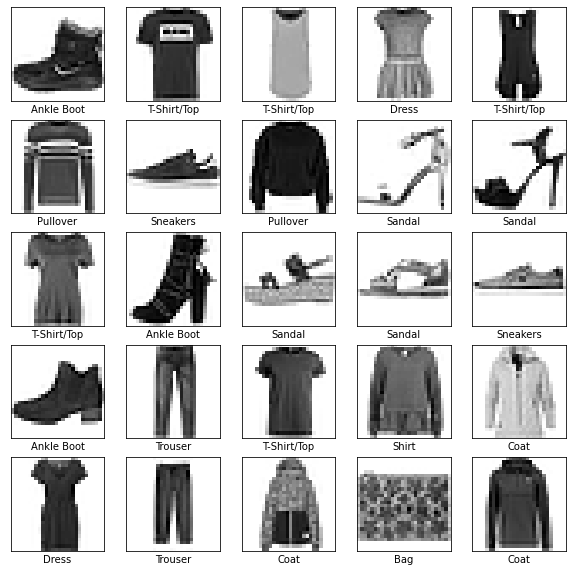

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2806 - accuracy: 0.8956
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9006
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9038
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2488 - accuracy: 0.9079: 0s -
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2399 - accuracy: 0.9106
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2314 - accuracy: 0.9137
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2250 - accuracy: 0.9163
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2162 - accuracy: 0.9188
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2112 - accuracy: 0.9205
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss:

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # model performs better on training than testing data, caused by overfitting

313/313 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8833


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([9.2680534e-07, 3.2581989e-11, 2.7048834e-12, 3.7582661e-09,
       2.9549963e-11, 6.8229463e-05, 5.0529421e-09, 1.6452378e-02,
       1.3752308e-08, 9.8347843e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        colour = 'blue'
    else:
        colour = 'red'
    
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]), color=colour)

In [24]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

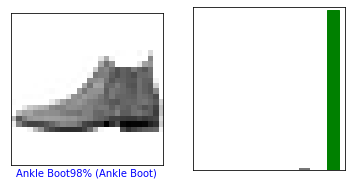

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

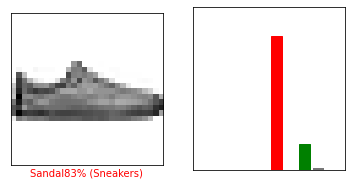

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

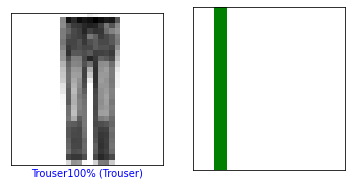

In [27]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

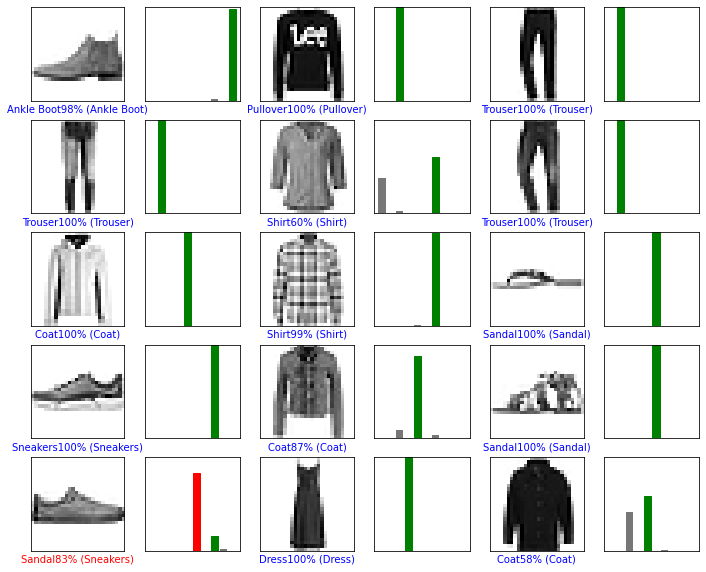

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [30]:
img = test_images[0]

print(img.shape)

(28, 28)


In [31]:
img = np.expand_dims(img, 0)
print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)
print(predictions_single)

[[9.2680892e-07 3.2582052e-11 2.7048730e-12 3.7582661e-09 2.9549904e-11
  6.8229463e-05 5.0529612e-09 1.6452361e-02 1.3752308e-08 9.8347843e-01]]


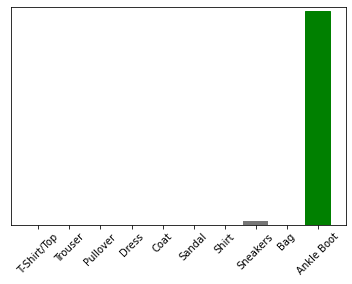

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)